In [1]:
from copy import copy

import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [2]:
pred_only_disc = np.load('/home/aga/Fizyka/licencjat/MachineLearning/tau_id_aga/pred_only_disc.npy')
pred_without_disc = np.load('/home/aga/Fizyka/licencjat/MachineLearning/tau_id_aga/pred_without_disc.npy')
pred_whole_data = np.load('/home/aga/Fizyka/licencjat/MachineLearning/tau_id_aga/pred_whole_data.npy')
pred_without_disc_and_byC = np.load(
    '/home/aga/Fizyka/licencjat/MachineLearning/tau_id_aga/pred_without_disc_and_byCombined.npy'
)
pred_without_byC = np.load(
    '/home/aga/Fizyka/licencjat/MachineLearning/tau_id_aga/pred_without_byCombined.npy'
)
pred_whole_xgb = np.load(
    '/home/aga/Fizyka/licencjat/MachineLearning/tau_id_aga/pred_whole_data_xgb.npy'
)
pred_without_disc_xgb = np.load(
    '/home/aga/Fizyka/licencjat/MachineLearning/tau_id_aga/pred_without_disc_xgb.npy'
)
pred_without_byCombined_xgb = np.load(
    '/home/aga/Fizyka/licencjat/MachineLearning/tau_id_aga/pred_without_byCombined_xgb.npy'
)
pred_new_model = np.load(
    '/home/aga/Fizyka/licencjat/MachineLearning/tau_id_aga/pred_new_whole_data.npy'
)
pred_new_model_without_disc = np.load(
    '/home/aga/Fizyka/licencjat/MachineLearning/tau_id_aga/pred_new_data_without_dics.npy'
)
pred_new_model_without_byCombined = np.load(
    '/home/aga/Fizyka/licencjat/MachineLearning/tau_id_aga/pred_new_data_without_byCombined.npy'
)

In [3]:
# models = ['leg_2_DPFTau_2016_v1tauVSall', 'leg_2_deepTau2017v1tauVSall', 
#           'leg_2_deepTau2017v1tauVSjet', 'leg_2_byIsolationMVArun2v1DBnewDMwLTraw2017v2']
models = ['leg_2_deepTau2017v1tauVSjet']
# models = []

In [4]:
fileName = 'htt_features_test.pkl'
legs, jets, global_params, properties = pd.read_pickle(fileName)

In [5]:
y_true = np.array(global_params["sampleType"])
y_true = np.reshape(y_true, (-1, 1))

In [34]:
y_preds = {model: copy(properties[model]) for model in models}

# Redefining DPF
# DPF_name = "leg_2_DPFTau_2016_v1tauVSall"
# y_preds[DPF_name] = [-1 * x + 1 if -1 * x + 1 < 1 else 0 for x in y_preds[DPF_name]]

# y_preds['Same klasyfikatory'] = pred_only_disc
# y_preds['Stara sieć neuronowa'] = pred_without_disc
# y_preds['Stara sieć neuronowa'] = pred_whole_data
# y_preds['Stara sieć bez byCombined'] = pred_without_byC
# y_preds['XGBoost'] = pred_whole_xgb
# y_preds['XGB bez byCombined'] = pred_without_byCombined_xgb
# y_preds['XGBoost'] = pred_without_disc_xgb
y_preds['Nowa sieć neuronowa'] = pred_new_model
y_preds['Nowa sieć neuronowa bez dyskryminatorów'] = pred_new_model_without_disc
y_preds['Nowa sieć neuronowa bez głównej zmiennej'] = pred_new_model_without_byCombined

ROC AUC score for leg_2_deepTau2017v1tauVSjet model:  0.9947219762323518
ROC AUC score for Nowa sieć neuronowa model:  0.9977225674981339
ROC AUC score for Nowa sieć neuronowa bez dyskryminatorów model:  0.995097622410334
ROC AUC score for Nowa sieć neuronowa bez głównej zmiennej model:  0.9981293517444123


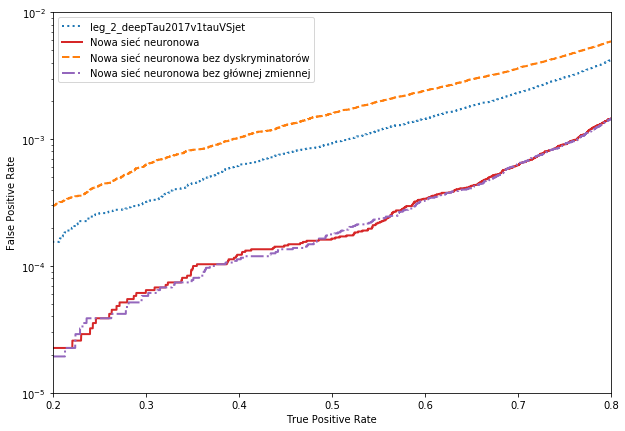

In [41]:
plt.figure(figsize=(10, 7))
linetype = {
    'leg_2_deepTau2017v1tauVSjet': 'C0:',
    'Same klasyfikatory': 'C1--',
    'XGBoost': 'C2-', 
    'Nowa sieć neuronowa': 'C3-',
    'Stara sieć neuronowa': 'C4-.',
    'Nowa sieć neuronowa bez dyskryminatorów': 'C1--',
    'Nowa sieć neuronowa bez głównej zmiennej': 'C4-.',
}
for model, y_pred in y_preds.items():
    print('ROC AUC score for {} model: '.format(model), roc_auc_score(y_true, y_pred))
    roc = roc_curve(y_true, y_pred)
    plt.semilogy(roc[1], roc[0], linetype[model], label=model, linewidth=2)
plt.xlim((0.2, 0.8))
# plt.xlim((0.6, 0.8))
# plt.xlim((0.0, 1.0))
plt.ylim((1e-5, 1e-2))  
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.legend()
# plt.title('Fragment krzywej ROC dla wybranych modeli na danych bez klasyfikatorów')
# plt.savefig('new_network_2.png', dpi=300)
plt.show()